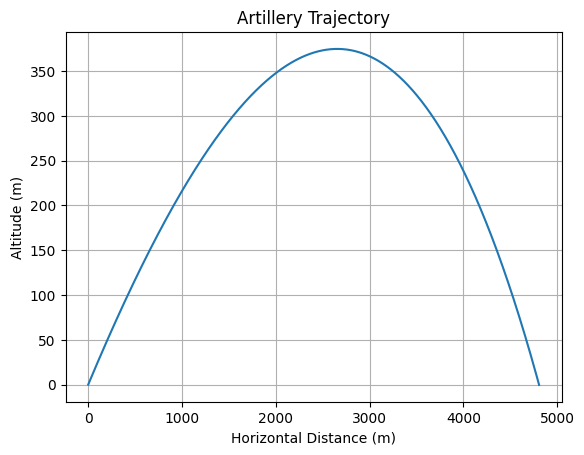

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def artillery_trajectory(v0, theta, phi, altitude, latitude, mass, Cd, area, dt=0.01, g=9.81, omega=7.2921159e-5):
    """
    Calculates the trajectory of an artillery projectile taking into account various factors.
    
    Arguments:
    v0 : float
        Initial velocity of the projectile (m/s).
    theta : float
        Elevation angle of the cannon (degrees).
    phi : float
        Azimuth angle of the cannon (degrees).
    altitude : float
        Altitude above sea level (meters).
    latitude : float
        Latitude of the firing location (degrees).
    mass : float
        Mass of the projectile (kg).
    Cd : float
        Drag coefficient of the projectile.
    area : float
        Cross-sectional area of the projectile (m^2).
    dt : float, optional
        Time step for numerical integration (seconds).
    g : float, optional
        Gravitational acceleration (m/s^2).
    omega : float, optional
        Angular velocity of the Earth (rad/s).
        
    Returns:
    t : array
        Array of time values (seconds).
    x : array
        Array of x-coordinate values (meters).
    y : array
        Array of y-coordinate values (meters).
    """
    
    # Convert angles to radians
    theta = np.radians(theta)
    phi = np.radians(phi)
    latitude = np.radians(latitude)
    
    # Initial position and velocity components
    x = 0.0
    y = 0.0
    vx = v0 * np.cos(theta) * np.cos(phi)
    vy = v0 * np.cos(theta) * np.sin(phi)
    vz = v0 * np.sin(theta)
    
    # Arrays to store trajectory
    t_values = [0.0]
    x_values = [x]
    y_values = [y]
    
    # Numerical integration
    while y >= 0.0:
        # Calculate air density based on altitude
        rho = air_density(altitude)
        
        # Calculate the relative velocity
        v_rel = np.sqrt(vx**2 + vy**2)
        
        # Calculate Coriolis effect
        f_cor = 2 * omega * np.sin(latitude)
        coriolis_x = f_cor * vy
        coriolis_y = -f_cor * vx
        
        # Calculate drag force
        drag_force = 0.5 * rho * v_rel**2 * Cd * area
        
        # Calculate acceleration components
        ax = -drag_force * np.cos(phi) / mass
        ay = (-mass * g - drag_force * np.sin(phi)) / mass + coriolis_y
        az = -g
        
        # Update velocity components
        vx += ax * dt
        vy += ay * dt
        vz += az * dt
        
        # Update position components
        x += vx * dt
        y += vy * dt + vz * dt
        
        # Update altitude for next iteration
        altitude += vz * dt
        
        # Update time
        t_values.append(t_values[-1] + dt)
        
        # Store position values
        x_values.append(x)
        y_values.append(y)
    
    return np.array(t_values), np.array(x_values), np.array(y_values)

def air_density(altitude):
    """
    Calculates air density based on altitude.
    
    Arguments:
    altitude : float
        Altitude above sea level (meters).
        
    Returns:
    rho : float
        Air density (kg/m^3).
    """
    # Simplified exponential model for air density
    rho0 = 1.225  # Air density at sea level (kg/m^3)
    scale_height = 8000.0  # Scale height of the atmosphere (m)
    return rho0 * np.exp(-altitude / scale_height)

# Example usage
v0 = 500.0  # Initial velocity (m/s)
theta = 14.0625  # Elevation angle (degrees)
phi = 0.0  # Azimuth angle (degrees)
altitude = 700.0  # Altitude above sea level (m)
latitude = 45.0  # Latitude (degrees)
mass = 46.9  # Projectile mass (kg)
Cd = 0.4  # Drag coefficient
area = 0.019  # Cross-sectional area (m^2)

t, x, y = artillery_trajectory(v0, theta, phi, altitude, latitude, mass, Cd, area)

# Plot trajectory
plt.plot(x, y)
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Altitude (m)')
plt.title('Artillery Trajectory')
plt.grid(True)
plt.show()


In [1]:
import math

# Function to calculate projectile motion
def projectile_motion(v0, angle, g=9.81):
    # Convert angle to radians
    angle_rad = math.radians(angle)
    
    # Calculate time of flight
    t_flight = (2 * v0 * math.sin(angle_rad)) / g
    
    # Calculate horizontal distance
    x_max = v0 * math.cos(angle_rad) * t_flight
    
    # Calculate maximum height
    y_max = (v0**2) * (math.sin(angle_rad)**2) / (2 * g)
    
    return t_flight, x_max, y_max

# Example usage:
initial_velocity = 500 # float(input("Enter the initial velocity (m/s): "))
launch_angle = 45 #float(input("Enter the launch angle (degrees): "))

# Call the function and display the results
time_of_flight, max_distance, max_height = projectile_motion(initial_velocity, launch_angle)
print(f"Time of Flight: {time_of_flight:.2f} seconds")
print(f"Maximum Horizontal Distance: {max_distance:.2f} meters")
print(f"Maximum Height: {max_height:.2f} meters")


Time of Flight: 72.08 seconds
Maximum Horizontal Distance: 25484.20 meters
Maximum Height: 6371.05 meters


In [3]:
import math

# Function to calculate projectile motion with drag
def projectile_motion_with_drag(v0, angle, mass, drag_coefficient, air_density, area, g=9.81):
    # Convert angle to radians
    angle_rad = math.radians(angle)
    
    # Initial velocity components
    v0x = v0 * math.cos(angle_rad)
    v0y = v0 * math.sin(angle_rad)
    
    # Time step for simulation
    dt = 0.01
    t = 0
    x = 0
    y = 0
    
    # Velocity components
    vx = v0x
    vy = v0y
    
    # Simulation loop
    while y >= 0:
        # Calculate the drag force
        F_drag_x = - (drag_coefficient * air_density * area * vx**2) / (2 * mass)
        F_drag_y = - (drag_coefficient * air_density * area * vy**2) / (2 * mass)
        
        # Update velocities
        vx += F_drag_x * dt
        vy += (F_drag_y - g) * dt
        
        # Update positions
        x += vx * dt
        y += vy * dt
        
        # Update time
        t += dt
    
    return t, x, y

# Example usage:
initial_velocity = 500 #float(input("Enter the initial velocity (m/s): "))
launch_angle = 45 #float(input("Enter the launch angle (degrees): "))
mass = 47 #float(input("Enter the mass of the projectile (kg): "))
drag_coefficient = .3 #float(input("Enter the drag coefficient: "))
air_density = 1.225 #float(input("Enter the air density (kg/m^3): "))
area = .019 #float(input("Enter the cross-sectional area of the projectile (m^2): "))

# Call the function and display the results
time_of_flight, max_distance, max_height = projectile_motion_with_drag(initial_velocity, launch_angle, mass, drag_coefficient, air_density, area)
print(f"Time of Flight: {time_of_flight:.2f} seconds")
print(f"Maximum Horizontal Distance: {max_distance:.2f} meters")
print(f"Maximum Height: {max_height:.2f} meters")


Time of Flight: 57.16 seconds
Maximum Horizontal Distance: 12339.73 meters
Maximum Height: -1.03 meters


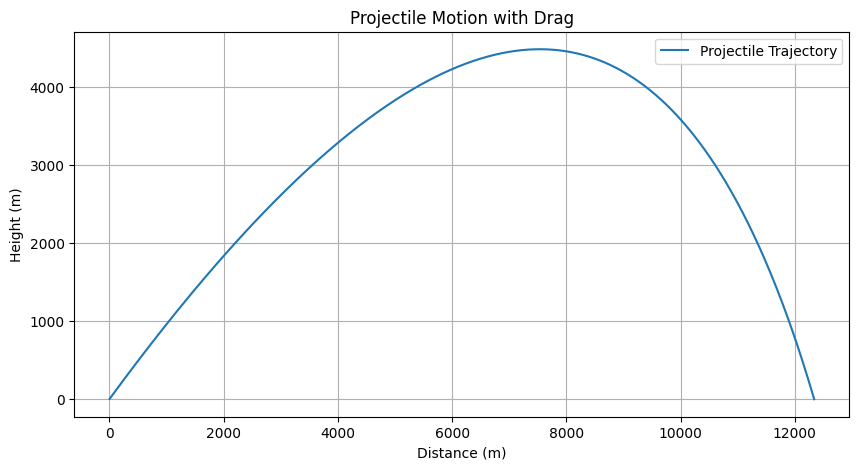

Time of Flight: 57.16 seconds
Maximum Horizontal Distance: 12339.73 meters
Maximum Height: 4480.67 meters


In [7]:
import math
import matplotlib.pyplot as plt

# Function to calculate projectile motion with drag
def projectile_motion_with_drag(v0, angle, mass, drag_coefficient, air_density, area, g=9.81):
    # Convert angle to radians
    angle_rad = math.radians(angle)
    
    # Initial velocity components
    v0x = v0 * math.cos(angle_rad)
    v0y = v0 * math.sin(angle_rad)
    
    # Time step for simulation
    dt = 0.01
    t = 0
    x = 0
    y = 0
    
    # Lists to store the trajectory points
    x_points = []
    y_points = []
    
    # Velocity components
    vx = v0x
    vy = v0y
    
    # Simulation loop
    while y >= 0:
        # Calculate the drag force
        F_drag_x = - (drag_coefficient * air_density * area * vx**2) / (2 * mass)
        F_drag_y = - (drag_coefficient * air_density * area * vy**2) / (2 * mass)
        
        # Update velocities
        vx += F_drag_x * dt
        vy += (F_drag_y - g) * dt
        
        # Update positions
        x += vx * dt
        y += vy * dt
        
        # Store the points
        x_points.append(x)
        y_points.append(y)
        
        # Update time
        t += dt
    
    return t, x, max(y_points),x_points, y_points

# Example usage:
initial_velocity = 500 #float(input("Enter the initial velocity (m/s): "))
launch_angle = 45 #float(input("Enter the launch angle (degrees): "))
mass = 47 #float(input("Enter the mass of the projectile (kg): "))
drag_coefficient = .3 #float(input("Enter the drag coefficient: "))
air_density = 1.225 #float(input("Enter the air density (kg/m^3): "))
area = .019 #float(input("Enter the cross-sectional area of the projectile (m^2): "))

# Call the function and display the results
time_of_flight, max_distance, max_height, x_vals, y_vals = projectile_motion_with_drag(initial_velocity, launch_angle, mass, drag_coefficient, air_density, area)

# Plotting the trajectory
plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label='Projectile Trajectory')
plt.title('Projectile Motion with Drag')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Time of Flight: {time_of_flight:.2f} seconds")
print(f"Maximum Horizontal Distance: {max_distance:.2f} meters")
print(f"Maximum Height: {max_height:.2f} meters")


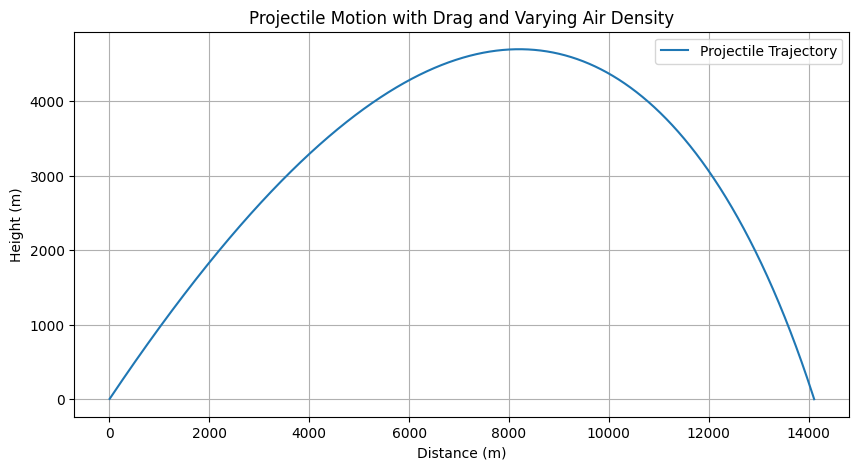

Time of Flight: 59.33 seconds
Maximum Horizontal Distance: 14111.88 meters
Maximum Height: 4696.01 meters


In [1]:
import math
import matplotlib.pyplot as plt

# Function to calculate air density with altitude
def air_density_with_altitude(h, rho0=1.225, H=8500):
    return rho0 * math.exp(-h / H)

# Function to calculate projectile motion with drag and varying air density
def projectile_motion_with_drag(v0, angle, mass, drag_coefficient, area, g=9.81):
    # Convert angle to radians
    angle_rad = math.radians(angle)
    
    # Initial velocity components
    v0x = v0 * math.cos(angle_rad)
    v0y = v0 * math.sin(angle_rad)
    
    # Time step for simulation
    dt = 0.01
    t = 0
    x = 0
    y = 0
    
    # Lists to store the trajectory points
    x_points = []
    y_points = []
    
    # Velocity components
    vx = v0x
    vy = v0y
    
    # Simulation loop
    while y >= 0:
        # Calculate the air density at current altitude
        rho = air_density_with_altitude(y)
        
        # Calculate the drag force
        F_drag_x = - (drag_coefficient * rho * area * vx**2) / (2 * mass)
        F_drag_y = - (drag_coefficient * rho * area * vy**2) / (2 * mass)
        
        # Update velocities
        vx += F_drag_x * dt
        vy += (F_drag_y - g) * dt
        
        # Update positions
        x += vx * dt
        y += vy * dt
        
        # Store the points
        x_points.append(x)
        y_points.append(y)
        
        # Update time
        t += dt
    
    return t, x, max(y_points), x_points, y_points

# Example usage:
initial_velocity = 500
launch_angle = 45
mass = 47
drag_coefficient = .3
area = .019

# Call the function and display the results
time_of_flight, max_distance, max_height, x_vals, y_vals = projectile_motion_with_drag(initial_velocity, launch_angle, mass, drag_coefficient, area)

# Plotting the trajectory
plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label='Projectile Trajectory')
plt.title('Projectile Motion with Drag and Varying Air Density')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Time of Flight: {time_of_flight:.2f} seconds")
print(f"Maximum Horizontal Distance: {max_distance:.2f} meters")
print(f"Maximum Height: {max_height:.2f} meters")


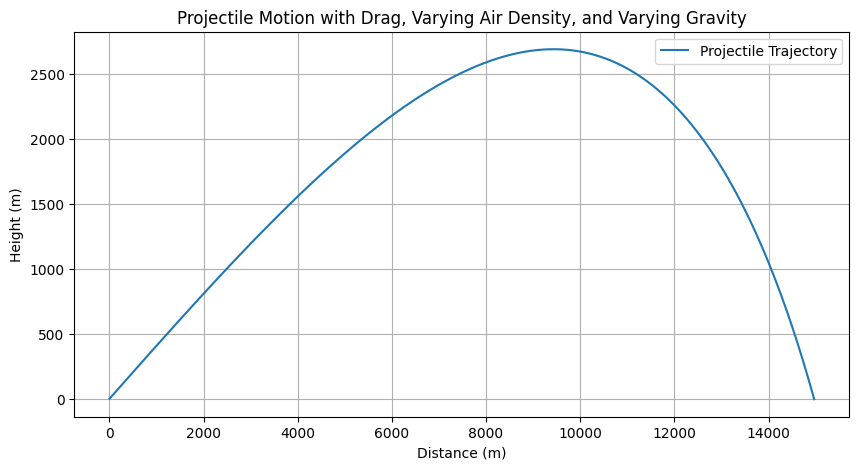

Time of Flight: 45.18 seconds
Maximum Horizontal Distance: 14967.80 meters
Maximum Height: 2691.85 meters


In [8]:
import math
import matplotlib.pyplot as plt

# Function to calculate gravitational acceleration with latitude
def gravity_with_latitude(latitude, gp=9.832, alpha=0.0053024):
    latitude_rad = math.radians(latitude)
    return gp * (1 + alpha * math.sin(latitude_rad)**2)

# Function to calculate projectile motion with drag, varying air density, and varying gravity
def projectile_motion_with_drag(v0, angle, mass, drag_coefficient, area, latitude):
    # Convert angle to radians
    angle_rad = math.radians(angle)
    
    # Initial velocity components
    v0x = v0 * math.cos(angle_rad)
    v0y = v0 * math.sin(angle_rad)
    
    # Time step for simulation
    dt = 0.01
    t = 0
    x = 0
    y = 0
    
    # Lists to store the trajectory points
    x_points = []
    y_points = []
    
    # Velocity components
    vx = v0x
    vy = v0y
    
    # Calculate the gravitational acceleration for the given latitude
    g = gravity_with_latitude(latitude)
    
    # Simulation loop
    while y >= 0:
        # Calculate the air density at current altitude
        rho = air_density_with_altitude(y)
        
        # Calculate the drag force
        F_drag_x = - (drag_coefficient * rho * area * vx**2) / (2 * mass)
        F_drag_y = - (drag_coefficient * rho * area * vy**2) / (2 * mass)
        
        # Update velocities
        vx += F_drag_x * dt
        vy += (F_drag_y - g) * dt
        
        # Update positions
        x += vx * dt
        y += vy * dt
        
        # Store the points
        x_points.append(x)
        y_points.append(y)
        
        # Update time
        t += dt
    
    return t, x, max(y_points), x_points, y_points

# Example usage:
initial_velocity = 682.7
launch_angle = 396.8/3200*180
mass = 46.9
drag_coefficient = .382
area = .019
latitude = 6.78 # Frankfurt's approximate latitude

# Call the function and display the results
time_of_flight, max_distance, max_height, x_vals, y_vals = projectile_motion_with_drag(initial_velocity, launch_angle, mass, drag_coefficient, area, latitude)

# Plotting the trajectory
plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label='Projectile Trajectory')
plt.title('Projectile Motion with Drag, Varying Air Density, and Varying Gravity')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Time of Flight: {time_of_flight:.2f} seconds")
print(f"Maximum Horizontal Distance: {max_distance:.2f} meters")
print(f"Maximum Height: {max_height:.2f} meters")


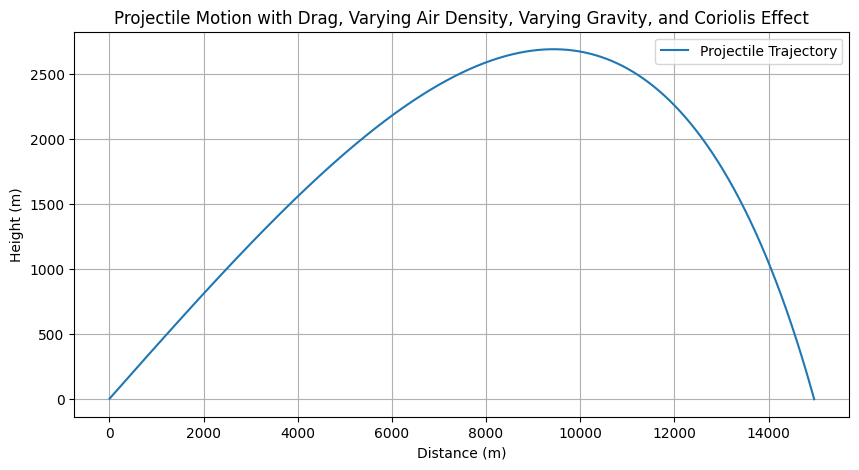

Time of Flight: 45.18 seconds
Maximum Horizontal Distance: 14967.80 meters
Maximum Height: 2691.85 meters
Deflection due to Coriolis Effect: 0.00 meters


In [9]:
import math
import matplotlib.pyplot as plt

# Constants
EARTH_ANGULAR_VELOCITY = 7.2921e-5  # rad/s

# Function to calculate gravitational acceleration with latitude
def gravity_with_latitude(latitude, gp=9.832, alpha=0.0053024):
    latitude_rad = math.radians(latitude)
    return gp * (1 + alpha * math.sin(latitude_rad)**2)

# Function to calculate air density with altitude
def air_density_with_altitude(h, rho0=1.225, H=8500):
    return rho0 * math.exp(-h / H)

# Function to calculate the Coriolis force
def coriolis_force(vy, latitude):
    omega = EARTH_ANGULAR_VELOCITY
    latitude_rad = math.radians(latitude)
    # Coriolis acceleration
    a_coriolis = 2 * omega * vy * math.sin(latitude_rad)
    return a_coriolis

# Function to calculate projectile motion with drag, varying air density, varying gravity, and the Coriolis effect
def projectile_motion_with_drag(v0, angle, mass, drag_coefficient, area, latitude):
    # Convert angle to radians
    angle_rad = math.radians(angle)
    
    # Initial velocity components
    v0x = v0 * math.cos(angle_rad)
    v0y = v0 * math.sin(angle_rad)
    
    # Time step for simulation
    dt = 0.01
    t = 0
    x = 0
    y = 0
    z = 0  # z-axis for Coriolis effect
    
    # Lists to store the trajectory points
    x_points = []
    y_points = []
    z_points = []  # z-axis for Coriolis effect
    
    # Velocity components
    vx = v0x
    vy = v0y
    
    # Calculate the gravitational acceleration for the given latitude
    g = gravity_with_latitude(latitude)
    
    # Simulation loop
    while y >= 0:
        # Calculate the air density at current altitude
        rho = air_density_with_altitude(y)
        
        # Calculate the drag force
        F_drag_x = - (drag_coefficient * rho * area * vx**2) / (2 * mass)
        F_drag_y = - (drag_coefficient * rho * area * vy**2) / (2 * mass)
        
        # Calculate the Coriolis force
        F_coriolis = coriolis_force(vy, latitude)
        
        # Update velocities
        vx += F_drag_x * dt
        vy += (F_drag_y - g) * dt
        
        # Update positions
        x += vx * dt
        y += vy * dt
        z += F_coriolis * dt  # z-axis for Coriolis effect
        
        # Store the points
        x_points.append(x)
        y_points.append(y)
        z_points.append(z)  # z-axis for Coriolis effect
        
        # Update time
        t += dt
    
    return t, x, max(y_points), x_points, y_points, z_points

# Example usage:
initial_velocity = 682.7
launch_angle = 396.8/3200*180
mass = 46.9
drag_coefficient = .382
area = .019
latitude = 6.78 # Frankfurt's approximate latitude

# Call the function and display the results
time_of_flight, max_distance, max_height, x_vals, y_vals, z_vals = projectile_motion_with_drag(initial_velocity, launch_angle, mass, drag_coefficient, area, latitude)

# Plotting the trajectory
plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label='Projectile Trajectory')
plt.title('Projectile Motion with Drag, Varying Air Density, Varying Gravity, and Coriolis Effect')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.legend()
plt.grid(True)
plt.show()

# Note: The Coriolis effect is represented in the z-axis, which is not plotted in this 2D graph.
print(f"Time of Flight: {time_of_flight:.2f} seconds")
print(f"Maximum Horizontal Distance: {max_distance:.2f} meters")
print(f"Maximum Height: {max_height:.2f} meters")
print(f"Deflection due to Coriolis Effect: {z_vals[-1]:.2f} meters")


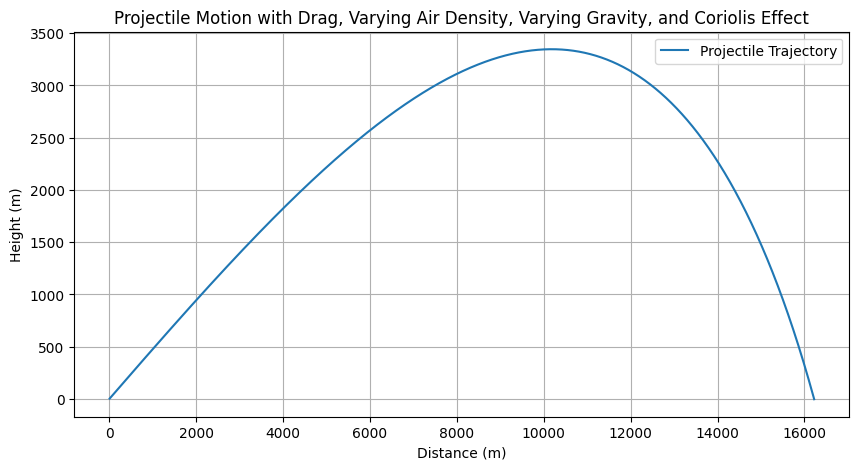

Time of Flight: 50.15 seconds
Maximum Horizontal Distance: 16225.47 meters
Maximum Height: 3347.02 meters
Deflection due to Coriolis Effect: 0.00 meters


In [50]:
import math
import matplotlib.pyplot as plt

# Constants
EARTH_ANGULAR_VELOCITY = 7.2921e-5  # rad/s

# Function to calculate gravitational acceleration with latitude
def gravity_with_latitude(latitude, gp=9.832, alpha=0.0053024):
    latitude_rad = math.radians(latitude)
    return gp * (1 + alpha * math.sin(latitude_rad)**2)

# Function to calculate air density with altitude
def air_density_with_altitude(h, rho0=1.225, H=8500):
    return rho0 * math.exp(-h / H)

# Function to calculate the Coriolis force
def coriolis_force(vx, vy, latitude, azimuth):
    omega = EARTH_ANGULAR_VELOCITY
    latitude_rad = math.radians(latitude)
    azimuth_rad = math.radians(azimuth)
    
    # Coriolis acceleration in the east-west direction (x-axis)
    a_coriolis_x = 2 * omega * vy * math.cos(latitude_rad) * math.sin(azimuth_rad)
    
    # Coriolis acceleration in the north-south direction (y-axis)
    a_coriolis_y = 2 * omega * (vx * math.sin(latitude_rad) - vy * math.cos(latitude_rad) * math.cos(azimuth_rad))
    
    return a_coriolis_x, a_coriolis_y

# Function to calculate projectile motion with drag, varying air density, varying gravity, and the Coriolis effect
def projectile_motion_with_drag(v0, angle, mass, drag_coefficient, area, latitude, azimuth):
    # Convert angle to radians
    angle_rad = math.radians(angle)
    
    # Initial velocity components
    v0x = v0 * math.cos(angle_rad)
    v0y = v0 * math.sin(angle_rad)
    
    # Time step for simulation
    dt = 0.01
    t = 0
    x = 0
    y = 0
    z = 0  # z-axis for Coriolis effect
    
    # Lists to store the trajectory points
    x_points = []
    y_points = []
    z_points = []  # z-axis for Coriolis effect
    
    # Velocity components
    vx = v0x
    vy = v0y
    
    # Calculate the gravitational acceleration for the given latitude
    g = gravity_with_latitude(latitude)
    
    # Simulation loop
    while y >= 0:
        # Calculate the air density at current altitude
        rho = air_density_with_altitude(y)
        
        # Calculate the drag force
        F_drag_x = - (drag_coefficient * rho * area * vx**2) / (2 * mass)
        F_drag_y = - (drag_coefficient * rho * area * vy**2) / (2 * mass)
        
        # Calculate the Coriolis force
        F_coriolis_x, F_coriolis_y = coriolis_force(vx, vy, latitude, azimuth)
        
        # Update velocities
        vx += (F_drag_x + F_coriolis_x) * dt
        vy += (F_drag_y + F_coriolis_y - g) * dt
        
        # Update positions
        x += vx * dt
        y += vy * dt
        z += F_coriolis_x * dt  # z-axis for Coriolis effect
        
        # Store the points
        x_points.append(x)
        y_points.append(y)
        z_points.append(z)  # z-axis for Coriolis effect
        
        # Update time
        t += dt
    
    return t, x, max(y_points), x_points, y_points, z_points

# Example usage:
initial_velocity = 682.0
launch_angle = 455.8/3200*180
mass = 103.5/2.2
drag_coefficient = .3683425
area = .019
latitude = 32 + 3/60 + 31/3600 # Frankfurt's approximate latitude
azimuth = 145/3200*180 # Firing due east

# Call the function and display the results
time_of_flight, max_distance, max_height, x_vals, y_vals, z_vals = projectile_motion_with_drag(initial_velocity, launch_angle, mass, drag_coefficient, area, latitude, azimuth)

# Plotting the trajectory
plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label='Projectile Trajectory')
plt.title('Projectile Motion with Drag, Varying Air Density, Varying Gravity, and Coriolis Effect')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.legend()
plt.grid(True)
plt.show()

# Note: The Coriolis effect is represented in the z-axis, which is not plotted in this 2D graph.
print(f"Time of Flight: {time_of_flight:.2f} seconds")
print(f"Maximum Horizontal Distance: {max_distance:.2f} meters")
print(f"Maximum Height: {max_height:.2f} meters")
print(f"Deflection due to Coriolis Effect: {z_vals[-1]:.2f} meters")


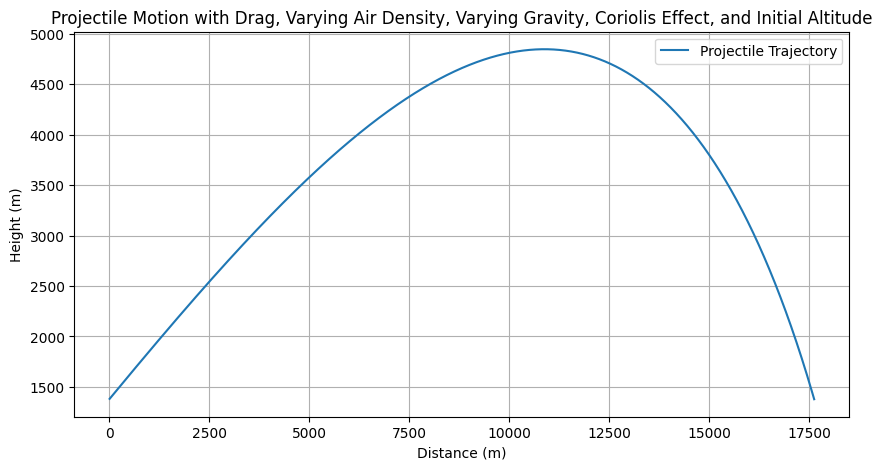

Time of Flight: 51.31 seconds
Maximum Horizontal Distance: 17620.61 meters
Maximum Height: 4847.35 meters above the initial altitude
Deflection due to Coriolis Effect: -0.00 meters


In [53]:
import math
import matplotlib.pyplot as plt

# Constants
EARTH_ANGULAR_VELOCITY = 7.2921e-5  # rad/s

# Function to calculate gravitational acceleration with latitude
def gravity_with_latitude(latitude, gp=9.832, alpha=0.0053024):
    latitude_rad = math.radians(latitude)
    return gp * (1 + alpha * math.sin(latitude_rad)**2)

# Function to calculate air density with altitude
def air_density_with_altitude(h, rho0=1.225, H=8500):
    return rho0 * math.exp(-h / H)

# Function to calculate the Coriolis force
def coriolis_force(vx, vy, latitude, azimuth):
    omega = EARTH_ANGULAR_VELOCITY
    latitude_rad = math.radians(latitude)
    azimuth_rad = math.radians(azimuth)
    
    # Coriolis acceleration in the east-west direction (x-axis)
    a_coriolis_x = -2 * omega * vy * math.cos(latitude_rad) * math.sin(azimuth_rad)
    
    # Coriolis acceleration in the north-south direction (y-axis)
    a_coriolis_y = 2 * omega * (vx * math.sin(latitude_rad) - vy * math.cos(latitude_rad) * math.cos(azimuth_rad))
    
    return a_coriolis_x, a_coriolis_y

# Function to calculate projectile motion with drag, varying air density, varying gravity, and the Coriolis effect
def projectile_motion_with_drag(v0, angle, mass, drag_coefficient, area, latitude, azimuth, initial_altitude):
    # Convert angle to radians
    angle_rad = math.radians(angle)
    
    # Initial velocity components
    v0x = v0 * math.cos(angle_rad)
    v0y = v0 * math.sin(angle_rad)
    
    # Time step for simulation
    dt = 0.01
    t = 0
    x = 0
    y = initial_altitude  # Set the initial altitude
    z = 0  # z-axis for Coriolis effect
    
    # Lists to store the trajectory points
    x_points = []
    y_points = []
    z_points = []  # z-axis for Coriolis effect
    
    # Velocity components
    vx = v0x
    vy = v0y
    
    # Calculate the gravitational acceleration for the given latitude
    g = gravity_with_latitude(latitude)
    
    # Simulation loop
    while y >= initial_altitude:  # Ensure the projectile doesn't go below the initial altitude
        # Calculate the air density at current altitude
        rho = air_density_with_altitude(y)
        
        # Calculate the drag force
        F_drag_x = - (drag_coefficient * rho * area * vx**2) / (2 * mass)
        F_drag_y = - (drag_coefficient * rho * area * vy**2) / (2 * mass)
        
        # Calculate the Coriolis force
        F_coriolis_x, F_coriolis_y = coriolis_force(vx, vy, latitude, azimuth)
        
        # Update velocities
        vx += (F_drag_x + F_coriolis_x) * dt
        vy += (F_drag_y + F_coriolis_y - g) * dt
        
        # Update positions
        x += vx * dt
        y += vy * dt
        z += F_coriolis_x * dt  # z-axis for Coriolis effect
        
        # Store the points
        x_points.append(x)
        y_points.append(y)
        z_points.append(z)  # z-axis for Coriolis effect
        
        # Update time
        t += dt
    
    return t, x, max(y_points), x_points, y_points, z_points

# Example usage:
initial_velocity = 682.0
launch_angle = 455.8/3200*180
mass = 103.5/2.2
drag_coefficient = .3683425
area = .019
latitude = 32 + 3/60 + 31/3600 # Frankfurt's approximate latitude
azimuth = 145/3200*180 # Firing due east
initial_altitude = 1379 # Launch altitude in meters

# Call the function and display the results
time_of_flight, max_distance, max_height, x_vals, y_vals, z_vals = projectile_motion_with_drag(initial_velocity, launch_angle, mass, drag_coefficient, area, latitude, azimuth, initial_altitude)

# Plotting the trajectory
plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label='Projectile Trajectory')
plt.title('Projectile Motion with Drag, Varying Air Density, Varying Gravity, Coriolis Effect, and Initial Altitude')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.legend()
plt.grid(True)
plt.show()

# Note: The Coriolis effect is represented in the z-axis, which is not plotted in this 2D graph.
print(f"Time of Flight: {time_of_flight:.2f} seconds")
print(f"Maximum Horizontal Distance: {max_distance:.2f} meters")
print(f"Maximum Height: {max_height:.2f} meters above the initial altitude")
print(f"Deflection due to Coriolis Effect: {z_vals[-1]:.2f} meters")


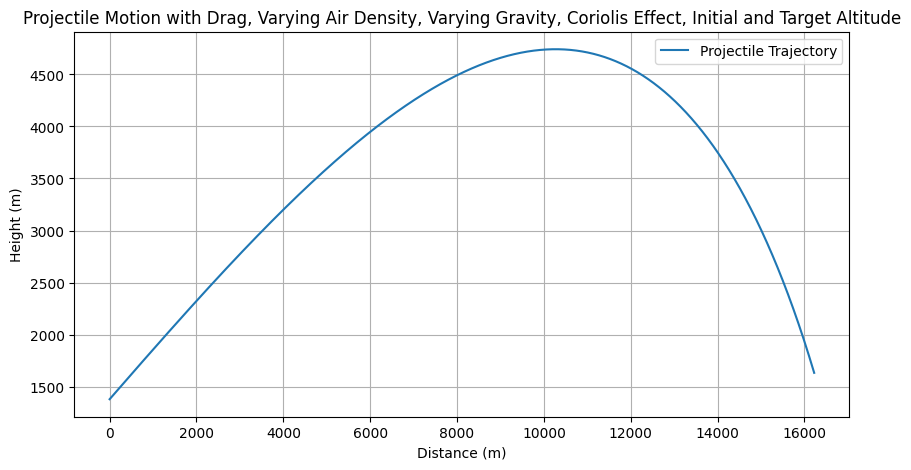

Time of Flight until reaching target altitude: 49.40 seconds
Horizontal Distance traveled until reaching target altitude: 16224.32 meters
Final altitude: 1632.60 meters
Deflection due to Coriolis Effect at target altitude: 0.00 meters


In [11]:
import math
import matplotlib.pyplot as plt
import pandas as pd

# Constants
EARTH_ANGULAR_VELOCITY = 7.2921e-5  # rad/s

# Function to calculate gravitational acceleration with latitude
def gravity_with_latitude(latitude, gp=9.832, alpha=0.0053024):
    latitude_rad = math.radians(latitude)
    return gp * (1 + alpha * math.sin(latitude_rad)**2)

# Function to calculate air density with altitude
def air_density_with_altitude(h, rho0=1.225, H=8500):
    return rho0 * math.exp(-h / H)

# Function to calculate the Coriolis force
def coriolis_force(vx, vy, latitude, azimuth):
    omega = EARTH_ANGULAR_VELOCITY
    latitude_rad = math.radians(latitude)
    azimuth_rad = math.radians(azimuth)
    
    # Coriolis acceleration in the east-west direction (x-axis)
    a_coriolis_x = 2 * omega * vy * math.cos(latitude_rad) * math.sin(azimuth_rad)
    
    # Coriolis acceleration in the north-south direction (y-axis)
    a_coriolis_y = 2 * omega * (vx * math.sin(latitude_rad) - vy * math.cos(latitude_rad) * math.cos(azimuth_rad))
    
    return a_coriolis_x, a_coriolis_y

# Function to calculate projectile motion with drag, varying air density, varying gravity, and the Coriolis effect
def projectile_motion_with_drag(v0, angle, mass, drag_coefficient, area, latitude, azimuth, initial_altitude, target_altitude):
    # Convert angle to radians
    angle_rad = math.radians(angle)
    
    # Initial velocity components
    v0x = v0 * math.cos(angle_rad)
    v0y = v0 * math.sin(angle_rad)
    # Velocity components
    vx = v0x
    vy = v0y
    
    # Time step for simulation
    dt = 0.01
    t = 0
    x = 0
    y = initial_altitude  # Set the initial altitude
    z = 0  # z-axis for Coriolis effect
    
    # Lists to store the trajectory points
    t_time = []
    x_points = []
    y_points = []
    z_points = []  # z-axis for Coriolis effect
    vx_comp = []
    vy_comp = []
    v_mag = []
    v_qe = []

    # Store the initial points
    t_time.append(t) # seconds
    x_points.append(x) # meters
    y_points.append(y) # meters
    z_points.append(z)  # z-axis for Coriolis effect
    vx_comp.append(v0x)
    vy_comp.append(v0y)
    v_mag.append(v0)

    
    
    # Calculate the gravitational acceleration for the given latitude
    g = gravity_with_latitude(latitude)
    
    # Simulation loop
    while y >= 0:
        # Calculate the air density at current altitude
        rho = air_density_with_altitude(y)
        
        # Calculate the drag force
        F_drag_x = - (drag_coefficient * rho * area * vx**2) / (2 * mass)
        F_drag_y = - (drag_coefficient * rho * area * vy**2) / (2 * mass)
        
        # Calculate the Coriolis force
        F_coriolis_x, F_coriolis_y = coriolis_force(vx, vy, latitude, azimuth)
        
        # Update velocities
        vx += (F_drag_x + F_coriolis_x) * dt
        vy += (F_drag_y + F_coriolis_y - g) * dt
        
        # Update positions
        x += vx * dt
        y += vy * dt
        z += F_coriolis_x * dt  # z-axis for Coriolis effect
        
        # Store the points
        x_points.append(x)
        y_points.append(y)
        z_points.append(z)  # z-axis for Coriolis effect
        
        # Check if the projectile has reached the target altitude
        if y <= target_altitude and vy < 0:
            break
        
        # Update time
        t += dt
    
    return t, x, y, z, x_points, y_points, z_points

# Example usage:
initial_velocity = 682.0
launch_angle = 455.8/3200*180
mass = 103.5/2.2
drag_coefficient = .4244
area = .019
latitude = 32 + 3/60 + 31/3600 # Frankfurt's approximate latitude
azimuth = 145/3200*180 # Firing due east
initial_altitude = 1379 # Launch altitude in meters
target_altitude = 1634 # Target altitude in meters



# Call the function and display the results
time_of_flight, final_x, final_y, final_z, x_vals, y_vals, z_vals = projectile_motion_with_drag(initial_velocity, launch_angle, mass, drag_coefficient, area, latitude, azimuth, initial_altitude, target_altitude)

shotdata = pd.DataFrame({'x':x_vals,'y':y_vals,'z':z_vals})
# Plotting the trajectory
plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label='Projectile Trajectory')
plt.title('Projectile Motion with Drag, Varying Air Density, Varying Gravity, Coriolis Effect, Initial and Target Altitude')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.legend()
plt.grid(True)
plt.show()

# Note: The Coriolis effect is represented in the z-axis, which is not plotted in this 2D graph.
print(f"Time of Flight until reaching target altitude: {time_of_flight:.2f} seconds")
print(f"Horizontal Distance traveled until reaching target altitude: {final_x:.2f} meters")
print(f"Final altitude: {final_y:.2f} meters")
print(f"Deflection due to Coriolis Effect at target altitude: {final_z:.2f} meters")


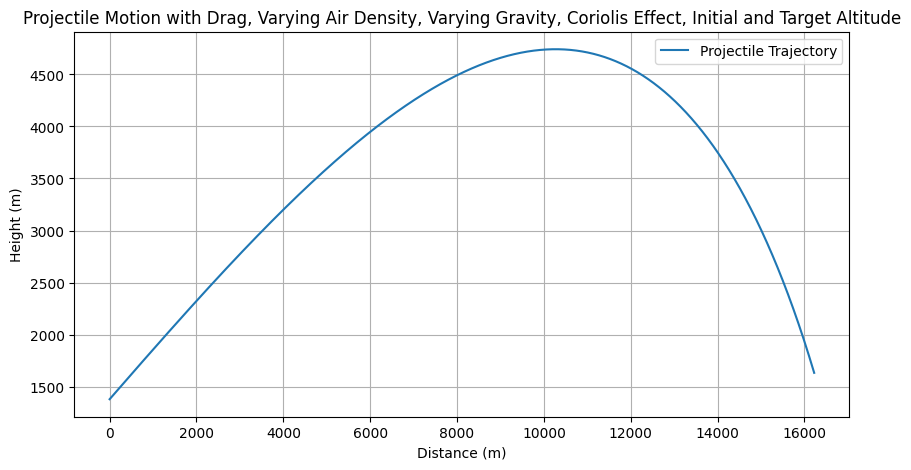

Time of Flight until reaching target altitude: 49.40 seconds
Horizontal Distance traveled until reaching target altitude: 16224.32 meters
Final altitude: 1632.60 meters
Deflection due to Coriolis Effect at target altitude: 0.00 meters


In [12]:
# Here is my artillery Shot data calculations

from numpy import radians, sin, exp, cos, tan
import matplotlib.pyplot as plt
import pandas as pd

# Constants
EARTH_ANGULAR_VELOCITY = 7.2921e-5  # rad/s

# Function to calculate gravitational acceleration with latitude
def gravity_with_latitude(latitude, gp=9.832, alpha=0.0053024):
    latitude_rad = radians(latitude)
    return gp * (1 + alpha * sin(latitude_rad)**2)

# Function to calculate air density with altitude
def air_density_with_altitude(h, rho0=1.225, H=8500):
    return rho0 * math.exp(-h / H)

# Function to calculate the Coriolis force
def coriolis_force(vx, vy, latitude, azimuth):
    omega = EARTH_ANGULAR_VELOCITY
    latitude_rad = math.radians(latitude)
    azimuth_rad = math.radians(azimuth)
    
    # Coriolis acceleration in the east-west direction (x-axis)
    a_coriolis_x = 2 * omega * vy * math.cos(latitude_rad) * math.sin(azimuth_rad)
    
    # Coriolis acceleration in the north-south direction (y-axis)
    a_coriolis_y = 2 * omega * (vx * math.sin(latitude_rad) - vy * math.cos(latitude_rad) * math.cos(azimuth_rad))
    
    return a_coriolis_x, a_coriolis_y

# Function to calculate projectile motion with drag, varying air density, varying gravity, and the Coriolis effect
def projectile_motion_with_drag(v0, angle, mass, drag_coefficient, area, latitude, azimuth, initial_altitude, target_altitude):
    # Convert angle to radians
    angle_rad = math.radians(angle)
    
    # Initial velocity components
    v0x = v0 * math.cos(angle_rad)
    v0y = v0 * sin(angle_rad)
    # Velocity components
    vx = v0x
    vy = v0y
    
    # Time step for simulation
    dt = 0.01
    t = 0
    x = 0
    y = initial_altitude  # Set the initial altitude
    z = 0  # z-axis for Coriolis effect
    
    # Lists to store the trajectory points
    t_time = []
    x_points = []
    y_points = []
    z_points = []  # z-axis for Coriolis effect
    vx_comp = []
    vy_comp = []
    v_mag = []
    v_qe = []

    # Store the initial points
    t_time.append(t) # seconds
    x_points.append(x) # meters
    y_points.append(y) # meters
    z_points.append(z)  # z-axis for Coriolis effect
    vx_comp.append(v0x)
    vy_comp.append(v0y)
    v_mag.append(v0)

    
    
    # Calculate the gravitational acceleration for the given latitude
    g = gravity_with_latitude(latitude)
    
    # Simulation loop
    while y >= 0:
        # Calculate the air density at current altitude
        rho = air_density_with_altitude(y)
        
        # Calculate the drag force
        F_drag_x = - (drag_coefficient * rho * area * vx**2) / (2 * mass)
        F_drag_y = - (drag_coefficient * rho * area * vy**2) / (2 * mass)
        
        # Calculate the Coriolis force
        F_coriolis_x, F_coriolis_y = coriolis_force(vx, vy, latitude, azimuth)
        
        # Update velocities
        vx += (F_drag_x + F_coriolis_x) * dt
        vy += (F_drag_y + F_coriolis_y - g) * dt
        
        # Update positions
        x += vx * dt
        y += vy * dt
        z += F_coriolis_x * dt  # z-axis for Coriolis effect
        
        # Store the points
        x_points.append(x)
        y_points.append(y)
        z_points.append(z)  # z-axis for Coriolis effect
        
        # Check if the projectile has reached the target altitude
        if y <= target_altitude and vy < 0:
            break
        
        # Update time
        t += dt
    
    return t, x, y, z, x_points, y_points, z_points

# Example usage:
initial_velocity = 682.0
launch_angle = 455.8/3200*180
mass = 103.5/2.2
drag_coefficient = .4244
area = .019
latitude = 32 + 3/60 + 31/3600 # Frankfurt's approximate latitude
azimuth = 145/3200*180 # Firing due east
initial_altitude = 1379 # Launch altitude in meters
target_altitude = 1634 # Target altitude in meters



# Call the function and display the results
time_of_flight, final_x, final_y, final_z, x_vals, y_vals, z_vals = projectile_motion_with_drag(initial_velocity, launch_angle, mass, drag_coefficient, area, latitude, azimuth, initial_altitude, target_altitude)

shotdata = pd.DataFrame({'x':x_vals,'y':y_vals,'z':z_vals})
# Plotting the trajectory
plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label='Projectile Trajectory')
plt.title('Projectile Motion with Drag, Varying Air Density, Varying Gravity, Coriolis Effect, Initial and Target Altitude')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.legend()
plt.grid(True)
plt.show()

# Note: The Coriolis effect is represented in the z-axis, which is not plotted in this 2D graph.
print(f"Time of Flight until reaching target altitude: {time_of_flight:.2f} seconds")
print(f"Horizontal Distance traveled until reaching target altitude: {final_x:.2f} meters")
print(f"Final altitude: {final_y:.2f} meters")
print(f"Deflection due to Coriolis Effect at target altitude: {final_z:.2f} meters")
